In [6]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.metrics import mean_squared_error as mse
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import metrics
from sklearn.feature_selection import SelectFromModel
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [7]:
data = pd.read_csv("D:/Games/archive 2/Steel_industry_data.csv")
data['day'] = pd.to_datetime(data['date']).dt.day
data['month'] = pd.to_datetime(data['date']).dt.month
data['year'] = pd.to_datetime(data['date']).dt.year
data.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,day,month,year
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load,1,1,2018
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load,1,1,2018
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load,1,1,2018
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load,1,1,2018
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load,1,1,2018


# Usage Pattern Based on day of the week 
As you can see the Industry Energy Consumption is high on the weekdays and low on the weekends.
The highest Industry Energy Consumption is seen on Thursday and lowest on Sunday, likewise for the Lagging Current reactive power.

C:\Users\coder\AppData\Local\Temp\ipykernel_19128\895781297.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  day_of_the_week_average_usage_data = data.groupby(pd.Grouper(key="WeekStatus")).mean()


<AxesSubplot: xlabel='WeekStatus'>

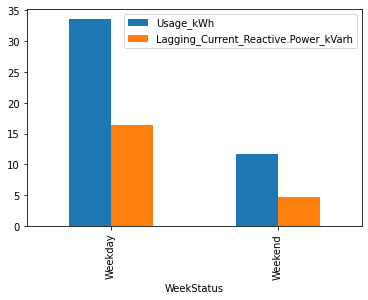

In [8]:
day_of_the_week_average_usage_data = data.groupby(pd.Grouper(key="WeekStatus")).mean()
day_of_the_week_average_usage_data.head()
day_of_the_week_average_usage_data.plot(y=["Usage_kWh","Lagging_Current_Reactive.Power_kVarh"], kind="bar")

C:\Users\coder\AppData\Local\Temp\ipykernel_19128\1985765325.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  day_of_the_week_average_usage_data = data.groupby(pd.Grouper(key="Day_of_week")).mean()


<AxesSubplot: xlabel='Day_of_week'>

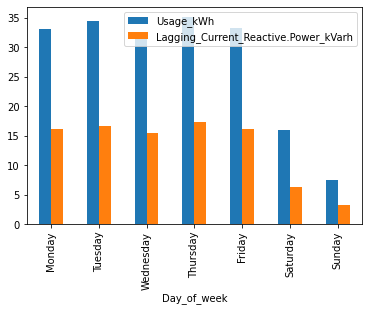

In [9]:
day_of_the_week_average_usage_data = data.groupby(pd.Grouper(key="Day_of_week")).mean()
day_of_the_week_average_usage_data.head()
day_of_the_week_average_usage_data.plot(y=["Usage_kWh","Lagging_Current_Reactive.Power_kVarh"], kind="bar")

# Usage Pattern Based on month of year 
As you can see the Industry Energy Consumption is highiest on January and lowest on September

C:\Users\coder\AppData\Local\Temp\ipykernel_19128\3268334832.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  day_of_the_week_average_usage_data = data.groupby(pd.Grouper(key="month")).mean()


<AxesSubplot: xlabel='month'>

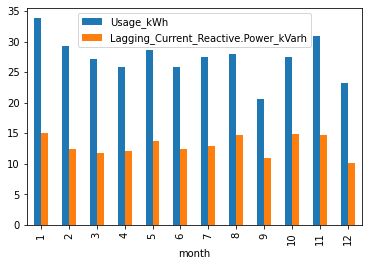

In [10]:
day_of_the_week_average_usage_data = data.groupby(pd.Grouper(key="month")).mean()
day_of_the_week_average_usage_data.head()
day_of_the_week_average_usage_data.plot(y=["Usage_kWh","Lagging_Current_Reactive.Power_kVarh"], kind="bar")

In [11]:
data = data.drop("date",axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Usage_kWh                             35040 non-null  float64
 1   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 2   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 3   CO2(tCO2)                             35040 non-null  float64
 4   Lagging_Current_Power_Factor          35040 non-null  float64
 5   Leading_Current_Power_Factor          35040 non-null  float64
 6   NSM                                   35040 non-null  int64  
 7   WeekStatus                            35040 non-null  object 
 8   Day_of_week                           35040 non-null  object 
 9   Load_Type                             35040 non-null  object 
 10  day                                   35040 non-null  int64  
 11  month          

In [12]:
data_encoded = pd.get_dummies(data, drop_first = True)
data_encoded

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,day,month,year,WeekStatus_Weekend,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Load_Type_Maximum_Load,Load_Type_Medium_Load
0,3.17,2.95,0.00,0.0,73.21,100.00,900,1,1,2018,0,1,0,0,0,0,0,0,0
1,4.00,4.46,0.00,0.0,66.77,100.00,1800,1,1,2018,0,1,0,0,0,0,0,0,0
2,3.24,3.28,0.00,0.0,70.28,100.00,2700,1,1,2018,0,1,0,0,0,0,0,0,0
3,3.31,3.56,0.00,0.0,68.09,100.00,3600,1,1,2018,0,1,0,0,0,0,0,0,0
4,3.82,4.50,0.00,0.0,64.72,100.00,4500,1,1,2018,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,3.85,4.86,0.00,0.0,62.10,100.00,82800,31,12,2018,0,1,0,0,0,0,0,0,0
35036,3.74,3.74,0.00,0.0,70.71,100.00,83700,31,12,2018,0,1,0,0,0,0,0,0,0
35037,3.78,3.17,0.07,0.0,76.62,99.98,84600,31,12,2018,0,1,0,0,0,0,0,0,0
35038,3.78,3.06,0.11,0.0,77.72,99.96,85500,31,12,2018,0,1,0,0,0,0,0,0,0


In [13]:
X = data_encoded.drop(columns=['Usage_kWh','year'], axis = 1)
y = data_encoded['Usage_kWh']

# Feature Selcetion using Lasso model
Important features are selected using the Lasso model.

In [14]:
clf = linear_model.Lasso(alpha=0.1)
clf = clf.fit(X, y)
model = SelectFromModel(clf, prefit=True)
selected_feat= X.columns[(model.get_support())]
X_filtered = pd.DataFrame(model.transform(X), columns=selected_feat)
X_filtered

c:\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,day,month,WeekStatus_Weekend,Load_Type_Maximum_Load,Load_Type_Medium_Load
0,2.95,0.00,73.21,100.00,900.0,1.0,1.0,0.0,0.0,0.0
1,4.46,0.00,66.77,100.00,1800.0,1.0,1.0,0.0,0.0,0.0
2,3.28,0.00,70.28,100.00,2700.0,1.0,1.0,0.0,0.0,0.0
3,3.56,0.00,68.09,100.00,3600.0,1.0,1.0,0.0,0.0,0.0
4,4.50,0.00,64.72,100.00,4500.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
35035,4.86,0.00,62.10,100.00,82800.0,31.0,12.0,0.0,0.0,0.0
35036,3.74,0.00,70.71,100.00,83700.0,31.0,12.0,0.0,0.0,0.0
35037,3.17,0.07,76.62,99.98,84600.0,31.0,12.0,0.0,0.0,0.0
35038,3.06,0.11,77.72,99.96,85500.0,31.0,12.0,0.0,0.0,0.0


# Standard scaling of data
Using the Standard Scaler function transformed the data to a scaled form

In [15]:
scaler = StandardScaler()
X_filtered_scalar = scaler.fit_transform(X_filtered)
X_filtered_scalar

array([[-0.61851634, -0.52138505, -0.38941049, ..., -0.63124277,
        -0.51174621, -0.61852709],
       [-0.52591107, -0.52138505, -0.72977211, ..., -0.63124277,
        -0.51174621, -0.61852709],
       [-0.59827811, -0.52138505, -0.54426446, ..., -0.63124277,
        -0.51174621, -0.61852709],
       ...,
       [-0.60502418, -0.51195662, -0.20918795, ..., -0.63124277,
        -0.51174621, -0.61852709],
       [-0.61177026, -0.50656895, -0.15105165, ..., -0.63124277,
        -0.51174621, -0.61852709],
       [-0.61422338, -0.51195662, -0.17747724, ..., -0.63124277,
        -0.51174621, -0.61852709]])

# Model Training
Trained LinearRegression, Ridge, Lasso and Deeplearning model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_filtered_scalar, y, test_size = 0.3, random_state = 42)

In [ ]:
#Linear Regression Model
lr = LinearRegression()
%time lr.fit(X_train, y_train)

#prediction
y_pred = lr.predict(X_test)
#check MSE
print('Mean Squared Error : ', mse(y_test, y_pred))

#visualize model
x = y_test
y = y_pred

plt.title('Linear Regression Model', fontsize = 15, color = 'm', pad = 12)
plt.plot(x, y, 'o', color = 'm')

m, b = np.polyfit(x, y, 1)
plt.plot(x, m * x + b, color = 'darkblue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [ ]:
#Ridge Regression Model
ridge = Ridge(alpha = 0.5)
%time ridge.fit(X_train, y_train)

#prediction
y_pred = ridge.predict(X_test)
#check MSE
print('Mean Squared Error : ', mse(y_test, y_pred))

#visualize model
x = y_test
y = y_pred

plt.title('Ridge Regression Model', fontsize = 15, color = 'g', pad = 12)
plt.plot(x, y, 'o', color = 'g')

m, b = np.polyfit(x, y, 1)
plt.plot(x, m * x + b, color = 'darkblue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [ ]:
#deep learning keras model with one relu layer created
model = keras.Sequential()
model.add(Dense(20, activation='relu', input_shape=[len(X_train[0])]))
model.add(Dense(1))

#compiling the model with adam optimiser and mse loss metrics
model.compile(optimizer= 'adam', loss='mse', metrics=['mse'])
%time history = model.fit(X_train, y_train, epochs=100, verbose=0)

y_pred = model.predict(X_test)
print(f"Mean Squared Error: {mse(y_pred, y_test)}")

#visualization of the graph
x = y_test
y = y_pred
plt.title(f'Deep Learning Model', fontsize = 15, color = 'r', pad = 12)
plt.plot(x, y, 'o', color = 'r')

m, b = np.polyfit(x, y, 1)
plt.plot(x, m * x + b, color = 'darkblue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# Conclusion
This clearly shows that the deep learning model with one hidden layer perfoms the best with the lowest MSE